In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
matplotlib.__version__

'3.8.4'

In [4]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
path = r'/Users/taraross/Desktop/all/DataAnalytics/Tasks/Achievement 6'

In [8]:
df = pd.read_csv(os.path.join(path,'listings_clean.csv'), index_col = False)

## Check Data

In [18]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,min nights,review num,last_review,reviews_per_month,count of host listings,availability_365,reviews count
0,4952,Place to stay in Palo Alto · ★4.81 · 1 bedroom...,7054,Mei Lin,Palo Alto,37.43932,-122.15741,Private room,65.0,7,84,10/28/23,0.48,5,253,7
1,11464,Rental unit in Santa Clara · ★4.50 · Studio · ...,42458,Emey,Santa Clara,37.34415,-121.98701,Entire home/apt,94.0,3,20,8/5/23,0.17,13,152,4
2,21373,Place to stay in Palo Alto · ★4.87 · 1 bedroom...,7054,Mei Lin,Palo Alto,37.43972,-122.15532,Private room,67.0,7,266,9/16/23,1.61,5,300,5
3,62799,Place to stay in Palo Alto · ★4.89 · 1 bedroom...,7054,Mei Lin,Palo Alto,37.43934,-122.15723,Private room,83.0,7,157,12/16/23,1.35,5,309,6
4,75284,Place to stay in Palo Alto · ★4.87 · 1 bedroom...,7054,Mei Lin,Palo Alto,37.43923,-122.15745,Private room,70.0,7,214,12/11/23,1.39,5,302,6


In [25]:
df.rename(columns = {'minimum_nights' : 'min nights', 'number_of_reviews': 'review num', 'calculated_host_listings_count' : 'count of host listings', 'reviews count' : 'reviews in past year'}, inplace = True)

In [26]:
df.dtypes

id                          int64
name                       object
host_id                     int64
host_name                  object
neighbourhood              object
latitude                  float64
longitude                 float64
room_type                  object
price                     float64
min nights                  int64
review num                  int64
last_review                object
reviews_per_month         float64
count of host listings      int64
availability_365            int64
reviews in past year        int64
dtype: object

## Correlations

In [29]:
# Filter only integer columns
int_columns_df = df.select_dtypes(include=['int64', 'float64'])

In [31]:
# Create a correlation matrix
int_columns_df.corr()

,id,host_id,latitude,longitude,price,min nights,review num,reviews_per_month,count of host listings,availability_365,reviews in past year
id,1.000000,0.452980,0.023462,0.051879,-0.004338,-0.116292,-0.350852,0.087527,0.029354,-0.011611,-0.046265
host_id,0.452980,1.000000,-0.013206,0.102103,0.030188,-0.103240,-0.188390,0.091114,0.030442,-0.033516,0.026920
latitude,0.023462,-0.013206,1.000000,-0.647606,0.001843,0.096258,-0.080680,-0.086506,0.121755,0.002859,-0.073846
longitude,0.051879,0.102103,-0.647606,1.000000,-0.046615,-0.122055,0.018885,0.087250,-0.124809,-0.017124,0.064102
price,-0.004338,0.030188,0.001843,-0.046615,1.000000,-0.027258,-0.021347,-0.024868,-0.004821,0.026020,-0.021572
min nights,-0.116292,-0.103240,0.096258,-0.122055,-0.027258,1.000000,-0.139432,-0.263946,0.187393,0.095920,-0.243468
review num,-0.350852,-0.188390,-0.080680,0.018885,-0.021347,-0.139432,1.000000,0.648552,-0.125649,-0.093839,0.635843
reviews_per_month,0.087527,0.091114,-0.086506,0.087250,-0.024868,-0.263946,0.648552,1.000000,-0.127203,-0.199477,0.848922
count of host listings,0.029354,0.030442,0.121755,-0.124809,-0.004821,0.187393,-0.125649,-0.127203,1.000000,0.124658,-0.112096
availability_365,-0.011611,-0.033516,0.002859,-0.017124,0.026020,0.095920,-0.093839,-0.199477,0.124658,1.000000,-0.173643


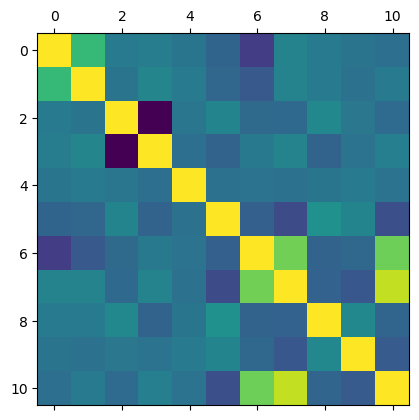

In [32]:
# Create a correlation heatmap using matplotlib
plt.matshow(int_columns_df.corr())
plt.show()

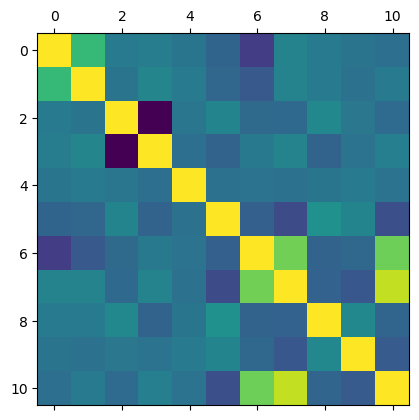

In [38]:
# Save figure
plt.matshow(int_columns_df.corr())
plt.savefig("heatmap_nolegend.png") 

In [34]:
#current dir
cwd = os.getcwd()
cwd

'/Users/taraross/Desktop/all/DataAnalytics/Tasks/Achievement 6'

Text(0.5, 1.0, 'Correlation Matrix')

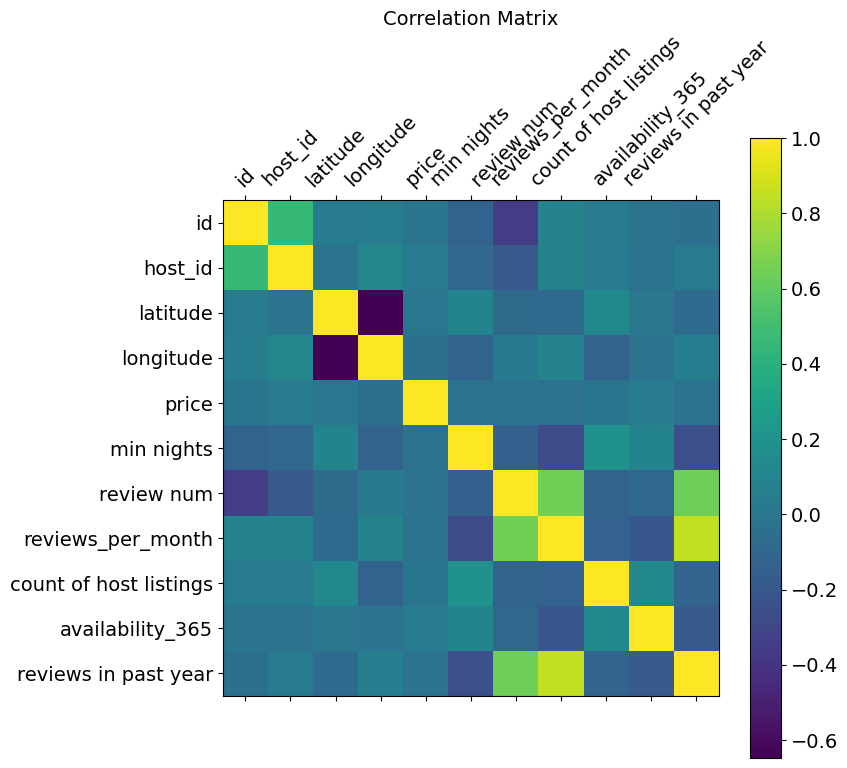

In [35]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(int_columns_df.corr(), fignum=f.number) # type of plot
plt.xticks(range(int_columns_df.shape[1]), int_columns_df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(int_columns_df.shape[1]), int_columns_df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

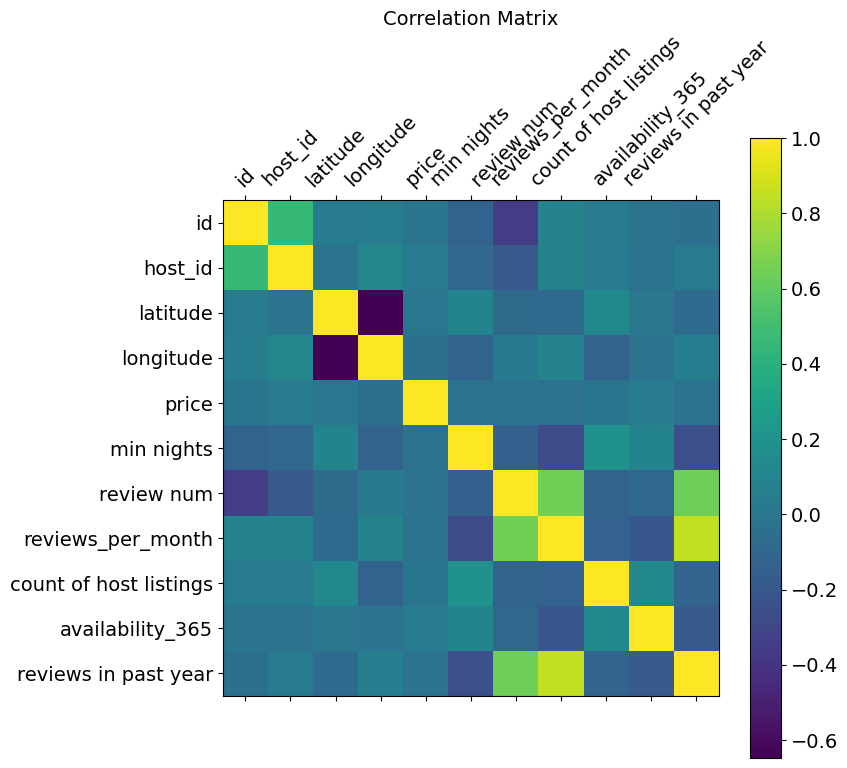

In [37]:
# Save figure
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(int_columns_df.corr(), fignum=f.number) # type of plot
plt.xticks(range(int_columns_df.shape[1]), int_columns_df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(int_columns_df.shape[1]), int_columns_df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title
plt.savefig("heatmap_legend.png") 

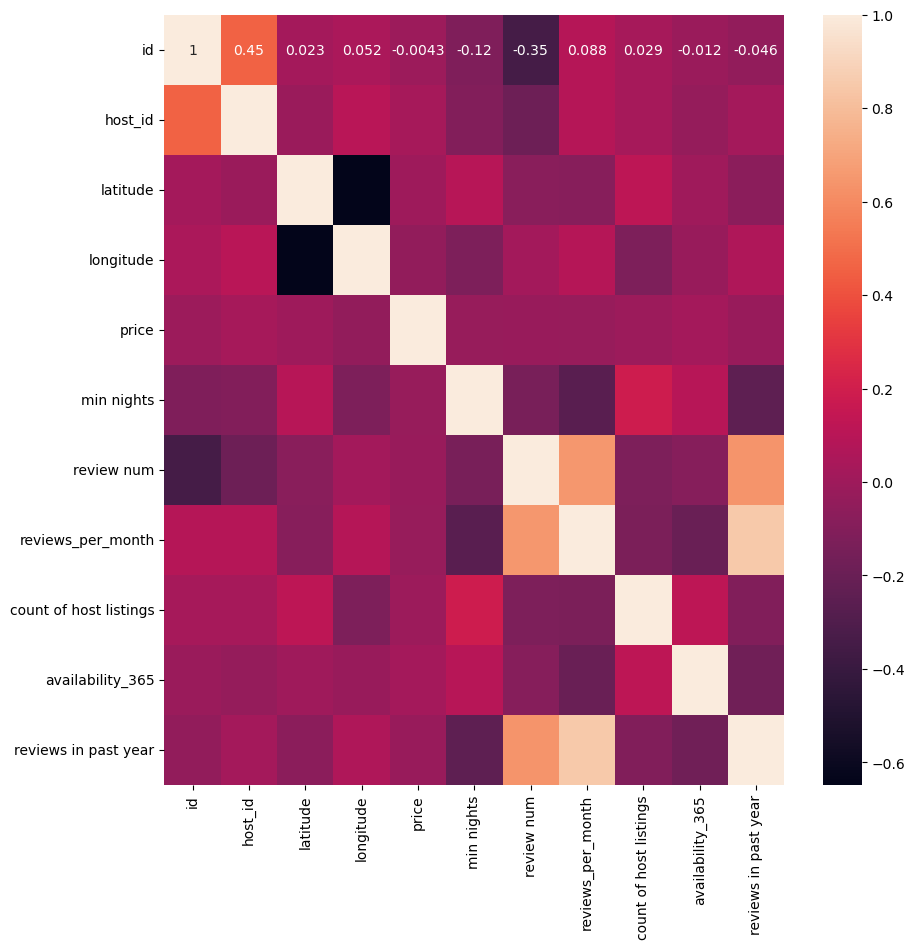

In [40]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(int_columns_df.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.
plt.savefig("seaborn_heatmap_legend.png") 

The 'price' variable seems to have little to no correlation with any other variable in the dataset. There is a slight negative correlation in 'price' compared to 'reviews in past year', which would mean that the less reviews a listing had in the past year leads to a lower price in the listing.

The only variables that seem to have any correlation are those that have to do with reviews. The more 'reviews in past year' leads to more 'review num' which would make sense as, more reviews would lead to more reviews.

There is also a negative correlation in 'reviews in past year' compared to 'min nights' which is saying that the lower the amount of reviews per year leads to a lower minimum night limit. 

## Scatterplot

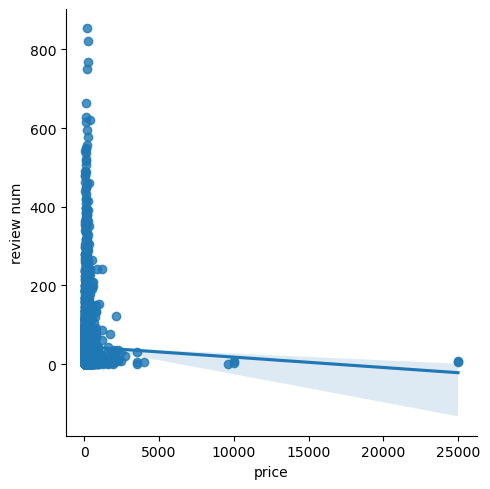

In [58]:
# Create a scatterplot for the "price" and "review num" columns in seaborn

sns.lmplot(x = 'price', y = 'review num', data = int_columns_df)
plt.savefig("price_vs_review_num.png") 

All of the scatter plots I create, look similar to this.  Basically, this is saying that the price of the listing don't relate to number of reviews for the listings.  I should try to find data to see how close these listings are to popular attractions and see if that has any effect on the pricing. 

## Pair Plots

In [56]:
# Keep only the variables you want to use in the pair plot
sub = int_columns_df[['price', 'min nights', 'review num', 'availability_365']]

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

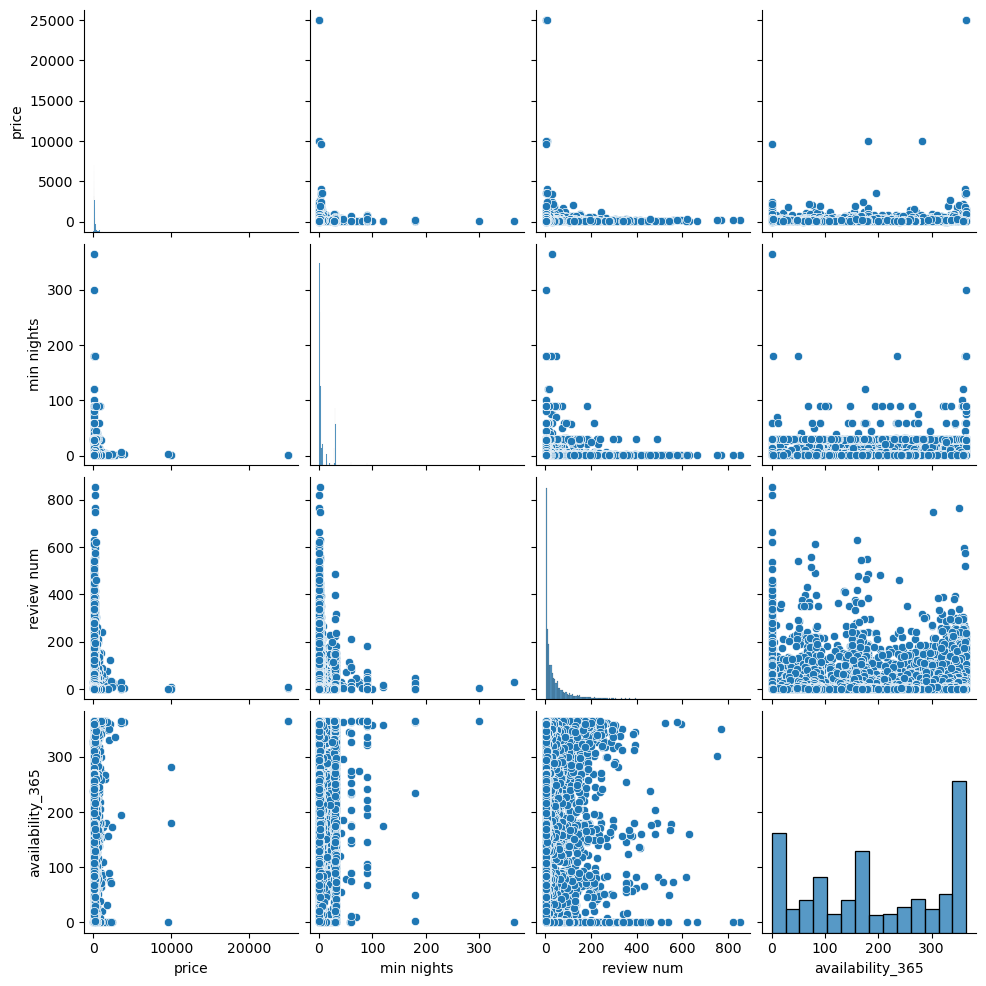

In [59]:
g = sns.pairplot(sub)
plt.savefig("pairplot.png") 

This data and scatterplots are more related to the price vs reviews vs availability.  There are no correlations on price vs reviews and availability.  I have a feeling that there will be more data that will correlate better with the qualitative data in this dataset.

## Categorical Plots

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='review num', ylabel='Count'>

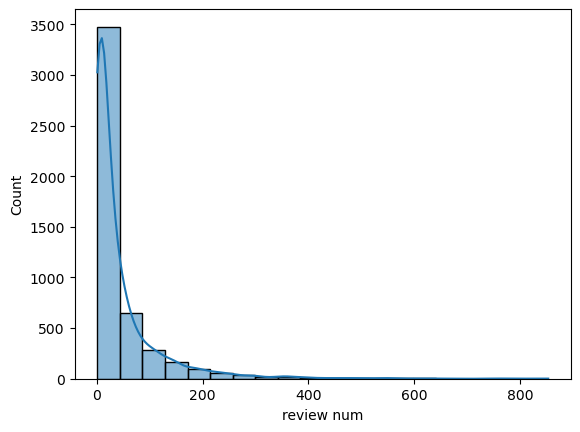

In [75]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

# Calculate the third quartile (75th percentile)
third_quartile = df['review num'].quantile(0.75)


sns.histplot(df['review num'], bins = 20, kde = True)

In [77]:
df.loc[df['review num'] < 100, 'Review category'] = 'Low reviews'

In [78]:
df.loc[(df['review num'] >= 100) & (df['review num'] < 200), 'Review category'] = 'Average reviews'

In [80]:
df.loc[df['review num'] >= 200, 'Review category'] = 'High reviews'

In [81]:
df['Review category'].value_counts(dropna=False)

Review category
Low reviews        4224
Average reviews     416
High reviews        205
Name: count, dtype: int64

In [89]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'min nights', 'review num',
       'last_review', 'reviews_per_month', 'count of host listings',
       'availability_365', 'reviews in past year', 'Review category'],
      dtype='object')

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


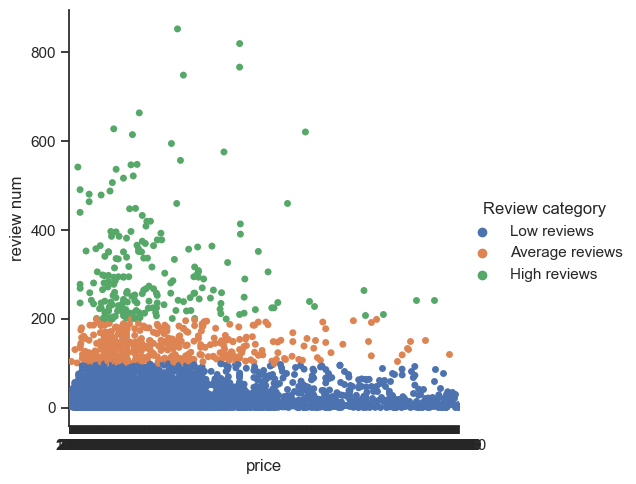

In [91]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="price", y="review num", hue="Review category", data=df)

In [92]:
# fig = g.get_figure()
g.savefig("categorical_plot_price_review_category.png") 

# Again, the image will be saved in the working directory. 

Once again, there is not much correlation bewteen number of reviews and the price of the listing.

## Hypothesis

My original question of if ratings and reviews impact the price of listings has been proven to have no correlation.

I do have questions on whether the neighborhood and room type have any correlation on the price, so further analysis into that will be my next steps.